# Post Estimation

## YouTube

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

YouTube video pose estimation

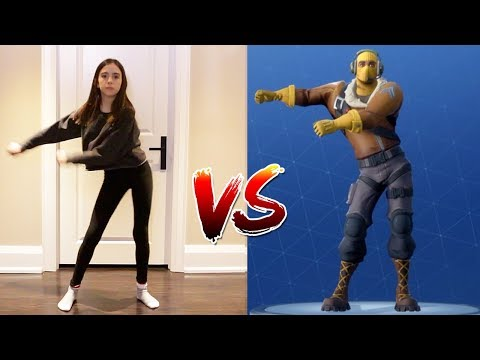

In [ ]:
YOUTUBE_ID = 'RXABo9hm8B8'
YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.25MiB in 00:03
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-li

In [ ]:
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

rm: cannot remove 'openpose.avi': No such file or directory
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 19.242295 seconds.
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --en

In [ ]:
# Visualize the result
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

## Single person pose estimation using openCV

In [ ]:
%%bash
# ------------------------- POSE MODELS -------------------------
# Downloading body pose (COCO and MPI).
OPENPOSE_URL="http://posefs1.perception.cs.cmu.edu/OpenPose/models/"
POSE_FOLDER="pose/"

# ------------------------- POSE MODELS -------------------------
# Body (BODY_25)
BODY_25_FOLDER=${POSE_FOLDER}"body_25/"
BODY_25_MODEL=${BODY_25_FOLDER}"pose_iter_584000.caffemodel"
wget -c ${OPENPOSE_URL}${BODY_25_MODEL} -P ${BODY_25_FOLDER}

# Body (COCO)
COCO_FOLDER=${POSE_FOLDER}"coco/"
COCO_MODEL=${COCO_FOLDER}"pose_iter_440000.caffemodel"
wget -c ${OPENPOSE_URL}${COCO_MODEL} -P ${COCO_FOLDER}
# Alternative: it will not check whether file was fully downloaded
# if [ ! -f $COCO_MODEL ]; then
#     wget ${OPENPOSE_URL}$COCO_MODEL -P $COCO_FOLDER
# fi

# Body (MPI)
MPI_FOLDER=${POSE_FOLDER}"mpi/"
MPI_MODEL=${MPI_FOLDER}"pose_iter_160000.caffemodel"
wget -c ${OPENPOSE_URL}${MPI_MODEL} -P ${MPI_FOLDER}

--2020-04-21 19:39:14--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/body_25/pose_iter_584000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104715850 (100M) [text/plain]
Saving to: ‘pose/body_25/pose_iter_584000.caffemodel’

     0K .......... .......... .......... .......... ..........  0%  236K 7m13s
    50K .......... .......... .......... .......... ..........  0%  236K 7m13s
   100K .......... .......... .......... .......... ..........  0%  472K 6m1s
   150K .......... .......... .......... .......... ..........  0%  473K 5m24s
   200K .......... .......... .......... .......... ..........  0% 73.5M 4m20s
   250K .......... .......... .......... .......... ..........  0%  474K 4m12s
   300K .......... .......... .......... .......... ..........  0%  475K 

In [ ]:
!git clone https://github.com/sparsh9012/cv-tricks.com.git

Cloning into 'cv-tricks.com'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1691 (delta 5), reused 14 (delta 3), pack-reused 1669
Receiving objects: 100% (1691/1691), 31.77 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [ ]:
# Load packages
import cv2 as cv
import numpy as np
import argparse
import imutils
import time

# Set hyperparameters
image_path = '/content/image.jpg'
proto_path = '/content/cv-tricks.com/OpenCV/Pose_Estimation/pose/coco/deploy_coco.prototxt'
model_path = '/content/pose/coco/pose_iter_440000.caffemodel'
dataset_type = 'COCO'
thr = 0.1
inWidth = 368
inHeight = 368

In [ ]:
if dataset_type == 'COCO':
    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                   "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

    POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                   ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                   ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                   ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]
elif dataset_type=='MPI':
    BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                   "Background": 15 }

    POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                   ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                   ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
else:
    
    BODY_PARTS ={"Nose":0,"Neck":1,"RShoulder":2,"RElbow":3,"RWrist":4,"LShoulder":5,
                 "LElbow":6,"LWrist":7,"MidHip":8,"RHip":9,"RKnee":10,"RAnkle":11,
                 "LHip":12,"LKnee":13,"LAnkle":14,"REye":15,"LEye":16,"REar":17,
                 "LEar":18,"LBigToe":19,"LSmallToe":20,"LHeel":21,"RBigToe":22,
                 "RSmallToe":23,"RHeel":24,"Background":25}

    POSE_PAIRS =[ ["Neck","MidHip"],   ["Neck","RShoulder"],   ["Neck","LShoulder"],
                 ["RShoulder","RElbow"],   ["RElbow","RWrist"],   ["LShoulder","LElbow"],
                 ["LElbow","LWrist"],   ["MidHip","RHip"],   ["RHip","RKnee"],  
                 ["RKnee","RAnkle"], ["MidHip","LHip"],  ["LHip","LKnee"], 
                 ["LKnee","LAnkle"], ["Neck","Nose"],   ["Nose","REye"], ["REye","REar"],  
                 ["Nose","LEye"], ["LEye","LEar"], ["RShoulder","REar"], ["LShoulder","LEar"],   
                 ["LAnkle","LBigToe"],["LBigToe","LSmallToe"], ["LAnkle","LHeel"], 
                 ["RAnkle","RBigToe"],["RBigToe","RSmallToe"],["RAnkle","RHeel"] ]

In [ ]:
net = cv.dnn.readNetFromCaffe(proto_path, model_path)

--2020-04-21 19:59:37--  https://img-new.cgtrader.com/items/1884734/529c66e1f3/large/rt045-male-t-pose-a-pose-3d-model-obj-mtl.jpg
Resolving img-new.cgtrader.com (img-new.cgtrader.com)... 13.226.159.42, 13.226.159.127, 13.226.159.65, ...
Connecting to img-new.cgtrader.com (img-new.cgtrader.com)|13.226.159.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14689 (14K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  14.34K  --.-KB/s    in 0.003s  

2020-04-21 19:59:37 (4.43 MB/s) - ‘image.jpg’ saved [14689/14689]



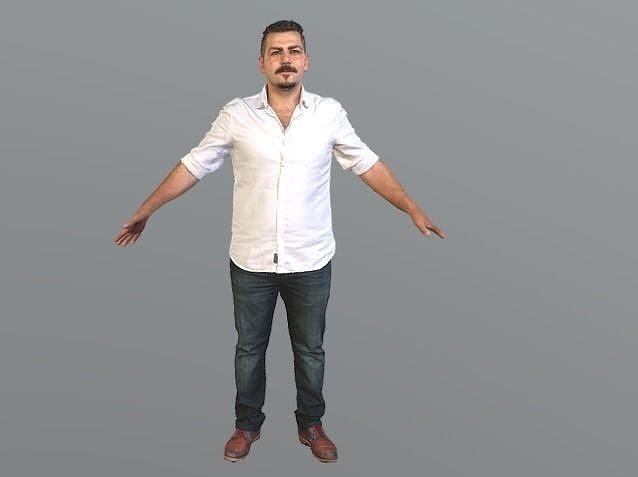

In [ ]:
from IPython.display import Image
# !wget -O image.jpg 'https://www.yogiapproved.com/wp-content/uploads/2019/07/super-soldier-pose-tutorial.jpg'
# !wget -O image.jpg 'https://images.squarespace-cdn.com/content/v1/5008a3c6c4aa6450352d2303/1391879880954-8QMIE9WMY98QDFUAVMM8/ke17ZwdGBToddI8pDm48kBl8_1bvTaK0zwPF031tlEZ7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1UaVAQsLVrvq65k1IgZ7SwHXVES00v_97yIbKoZwHpep9ivZn1FGG9dXq_zQDqMhZhQ/flying-pigeon-pose-yoga.jpg'
# !wget -O image.jpg 'https://cdn.shopify.com/s/files/1/0065/4626/0083/products/C0032.00_08_55_23.Still008_2000x.png?v=1576262975'
!wget -O image.jpg 'https://img-new.cgtrader.com/items/1884734/529c66e1f3/large/rt045-male-t-pose-a-pose-3d-model-obj-mtl.jpg'
Image(filename='image.jpg') 

In [ ]:
frame = cv.imread(image_path)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

inp = cv.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

In [ ]:
start_t = time.time()

net.setInput(inp)
out = net.forward()

print("time is ",time.time()-start_t)

In [ ]:
points = []
for i in range(len(BODY_PARTS)):
    # Slice heatmap of corresponging body's part.
    heatMap = out[0, i, :, :]

    # Originally, we try to find all the local maximums. To simplify a sample
    # we just find a global one. However only a single pose at the same time
    # could be detected this way.
    _, conf, _, point = cv.minMaxLoc(heatMap)
    x = (frameWidth * point[0]) / out.shape[3]
    y = (frameHeight * point[1]) / out.shape[2]

    # Add a point if it's confidence is higher than threshold.
    points.append((int(x), int(y)) if conf > thr else None)

for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if points[idFrom] and points[idTo]:
        cv.line(frame, points[idFrom], points[idTo], (255, 74, 0), 3)
        cv.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.putText(frame, str(idFrom), points[idFrom], cv.FONT_HERSHEY_SIMPLEX, 0.50, (255, 255, 255),1,cv.LINE_AA)
        cv.putText(frame, str(idTo), points[idTo], cv.FONT_HERSHEY_SIMPLEX, 0.50, (255, 255, 255),1,cv.LINE_AA)

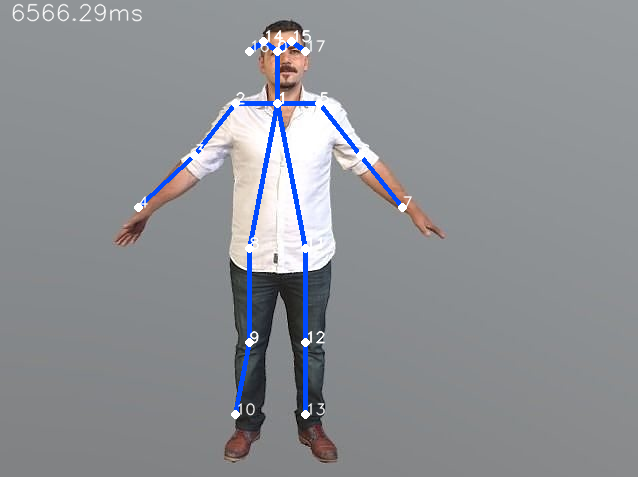

In [ ]:
t, _ = net.getPerfProfile()
freq = cv.getTickFrequency() / 1000
cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255),1,cv.LINE_AA)

from google.colab.patches import cv2_imshow
cv2_imshow(frame)

## Multi-person OpenCV

In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

from random import randint

In [ ]:
%%bash
# ------------------------- BODY, FACE AND HAND MODELS -------------------------
# Downloading body pose (COCO and MPI), face and hand models
OPENPOSE_URL="http://posefs1.perception.cs.cmu.edu/OpenPose/models/"
POSE_FOLDER="pose/"
FACE_FOLDER="face/"
HAND_FOLDER="hand/"

# ------------------------- POSE MODELS -------------------------
# Body (COCO)
COCO_FOLDER=${POSE_FOLDER}"coco/"
COCO_MODEL=${COCO_FOLDER}"pose_iter_440000.caffemodel"
wget -c ${OPENPOSE_URL}${COCO_MODEL} -P ${COCO_FOLDER}

--2020-04-21 20:51:24--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209274056 (200M) [text/plain]
Saving to: ‘pose/coco/pose_iter_440000.caffemodel’

     0K .......... .......... .......... .......... ..........  0%  111K 30m45s
    50K .......... .......... .......... .......... ..........  0%  111K 30m45s
   100K .......... .......... .......... .......... ..........  0%  221K 25m37s
   150K .......... .......... .......... .......... ..........  0%  221K 23m3s
   200K .......... .......... .......... .......... ..........  0%  222K 21m30s
   250K .......... .......... .......... .......... ..........  0%  187M 17m55s
   300K .......... .......... .......... .......... ..........  0%  221K 

In [ ]:
!git clone https://github.com/sparsh9012/cv-tricks.com.git

Cloning into 'cv-tricks.com'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1698 (delta 8), reused 14 (delta 3), pack-reused 1669
Receiving objects: 100% (1698/1698), 31.77 MiB | 4.94 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [ ]:
protoFile = "/content/cv-tricks.com/OpenCV/Pose_Estimation/pose/coco/pose_deploy_linevec.prototxt"
weightsFile = "pose/coco/pose_iter_440000.caffemodel"
nPoints = 18
# COCO Output Format
keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16] ]

# index of pafs correspoding to the POSE_PAIRS
# e.g for POSE_PAIR(1,2), the PAFs are located at indices (31,32) of output, Similarly, (1,5) -> (39,40) and so on.
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], 
          [19,20], [21,22], [23,24], [25,26], [27,28], [29,30], 
          [47,48], [49,50], [53,54], [51,52], [55,56], 
          [37,38], [45,46]]

colors = [ [0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255],
         [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
         [0,0,255], [255,0,0], [200,200,0], [255,0,0], [200,200,0], [0,0,0]]

In [ ]:
# Find the Keypoints using Non Maximum Suppression on the Confidence Map
def getKeypoints(probMap, threshold=0.1):
    
    mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)

    mapMask = np.uint8(mapSmooth>threshold)
    keypoints = []
    
    #find the blobs
    contours, _ = cv2.findContours(mapMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #for each blob find the maxima
    for cnt in contours:
        blobMask = np.zeros(mapMask.shape)
        blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
        maskedProbMap = mapSmooth * blobMask
        _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
        keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],))

    return keypoints


In [ ]:
# Find valid connections between the different joints of a all persons present
def getValidPairs(output):
    valid_pairs = []
    invalid_pairs = []
    n_interp_samples = 10
    paf_score_th = 0.1
    conf_th = 0.7
    # loop for every POSE_PAIR
    for k in range(len(mapIdx)):
        # A->B constitute a limb
        pafA = output[0, mapIdx[k][0], :, :]
        pafB = output[0, mapIdx[k][1], :, :]
        pafA = cv2.resize(pafA, (frameWidth, frameHeight))
        pafB = cv2.resize(pafB, (frameWidth, frameHeight))

        # Find the keypoints for the first and second limb
        candA = detected_keypoints[POSE_PAIRS[k][0]]
        candB = detected_keypoints[POSE_PAIRS[k][1]]
        nA = len(candA)
        nB = len(candB)

        # If keypoints for the joint-pair is detected
        # check every joint in candA with every joint in candB 
        # Calculate the distance vector between the two joints
        # Find the PAF values at a set of interpolated points between the joints
        # Use the above formula to compute a score to mark the connection valid
        
        if( nA != 0 and nB != 0):
            valid_pair = np.zeros((0,3))
            for i in range(nA):
                max_j=-1
                maxScore = -1
                found = 0
                for j in range(nB):
                    # Find d_ij
                    d_ij = np.subtract(candB[j][:2], candA[i][:2])
                    norm = np.linalg.norm(d_ij)
                    if norm:
                        d_ij = d_ij / norm
                    else:
                        continue
                    # Find p(u)
                    interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
                                            np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
                    # Find L(p(u))
                    paf_interp = []
                    for k in range(len(interp_coord)):
                        paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                                           pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ]) 
                    # Find E
                    paf_scores = np.dot(paf_interp, d_ij)
                    avg_paf_score = sum(paf_scores)/len(paf_scores)
                    
                    # Check if the connection is valid
                    # If the fraction of interpolated vectors aligned with PAF is higher then threshold -> Valid Pair  
                    if ( len(np.where(paf_scores > paf_score_th)[0]) / n_interp_samples ) > conf_th :
                        if avg_paf_score > maxScore:
                            max_j = j
                            maxScore = avg_paf_score
                            found = 1
                # Append the connection to the list
                if found:            
                    valid_pair = np.append(valid_pair, [[candA[i][3], candB[max_j][3], maxScore]], axis=0)

            # Append the detected connections to the global list
            valid_pairs.append(valid_pair)
        else: # If no keypoints are detected
            print("No Connection : k = {}".format(k))
            invalid_pairs.append(k)
            valid_pairs.append([])
    print(valid_pairs)
    return valid_pairs, invalid_pairs


In [ ]:
# This function creates a list of keypoints belonging to each person
# For each detected valid pair, it assigns the joint(s) to a person
# It finds the person and index at which the joint should be added. This can be done since we have an id for each joint
def getPersonwiseKeypoints(valid_pairs, invalid_pairs):
    # the last number in each row is the overall score 
    personwiseKeypoints = -1 * np.ones((0, 19))

    for k in range(len(mapIdx)):
        if k not in invalid_pairs:
            partAs = valid_pairs[k][:,0]
            partBs = valid_pairs[k][:,1]
            indexA, indexB = np.array(POSE_PAIRS[k])

            for i in range(len(valid_pairs[k])): 
                found = 0
                person_idx = -1
                for j in range(len(personwiseKeypoints)):
                    if personwiseKeypoints[j][indexA] == partAs[i]:
                        person_idx = j
                        found = 1
                        break

                if found:
                    personwiseKeypoints[person_idx][indexB] = partBs[i]
                    personwiseKeypoints[person_idx][-1] += keypoints_list[partBs[i].astype(int), 2] + valid_pairs[k][i][2]

                # if find no partA in the subset, create a new subset
                elif not found and k < 17:
                    row = -1 * np.ones(19)
                    row[indexA] = partAs[i]
                    row[indexB] = partBs[i]
                    # add the keypoint_scores for the two keypoints and the paf_score 
                    row[-1] = sum(keypoints_list[valid_pairs[k][i,:2].astype(int), 2]) + valid_pairs[k][i][2]
                    personwiseKeypoints = np.vstack([personwiseKeypoints, row])
    return personwiseKeypoints

--2020-04-21 21:11:18--  https://xdesktopwallpapers.com/wp-content/uploads/2011/10/Group-Pose-In-Gossip-Girl.jpg
Resolving xdesktopwallpapers.com (xdesktopwallpapers.com)... 78.46.39.46
Connecting to xdesktopwallpapers.com (xdesktopwallpapers.com)|78.46.39.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478852 (468K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 467.63K   315KB/s    in 1.5s    

2020-04-21 21:11:21 (315 KB/s) - ‘img.jpg’ saved [478852/478852]



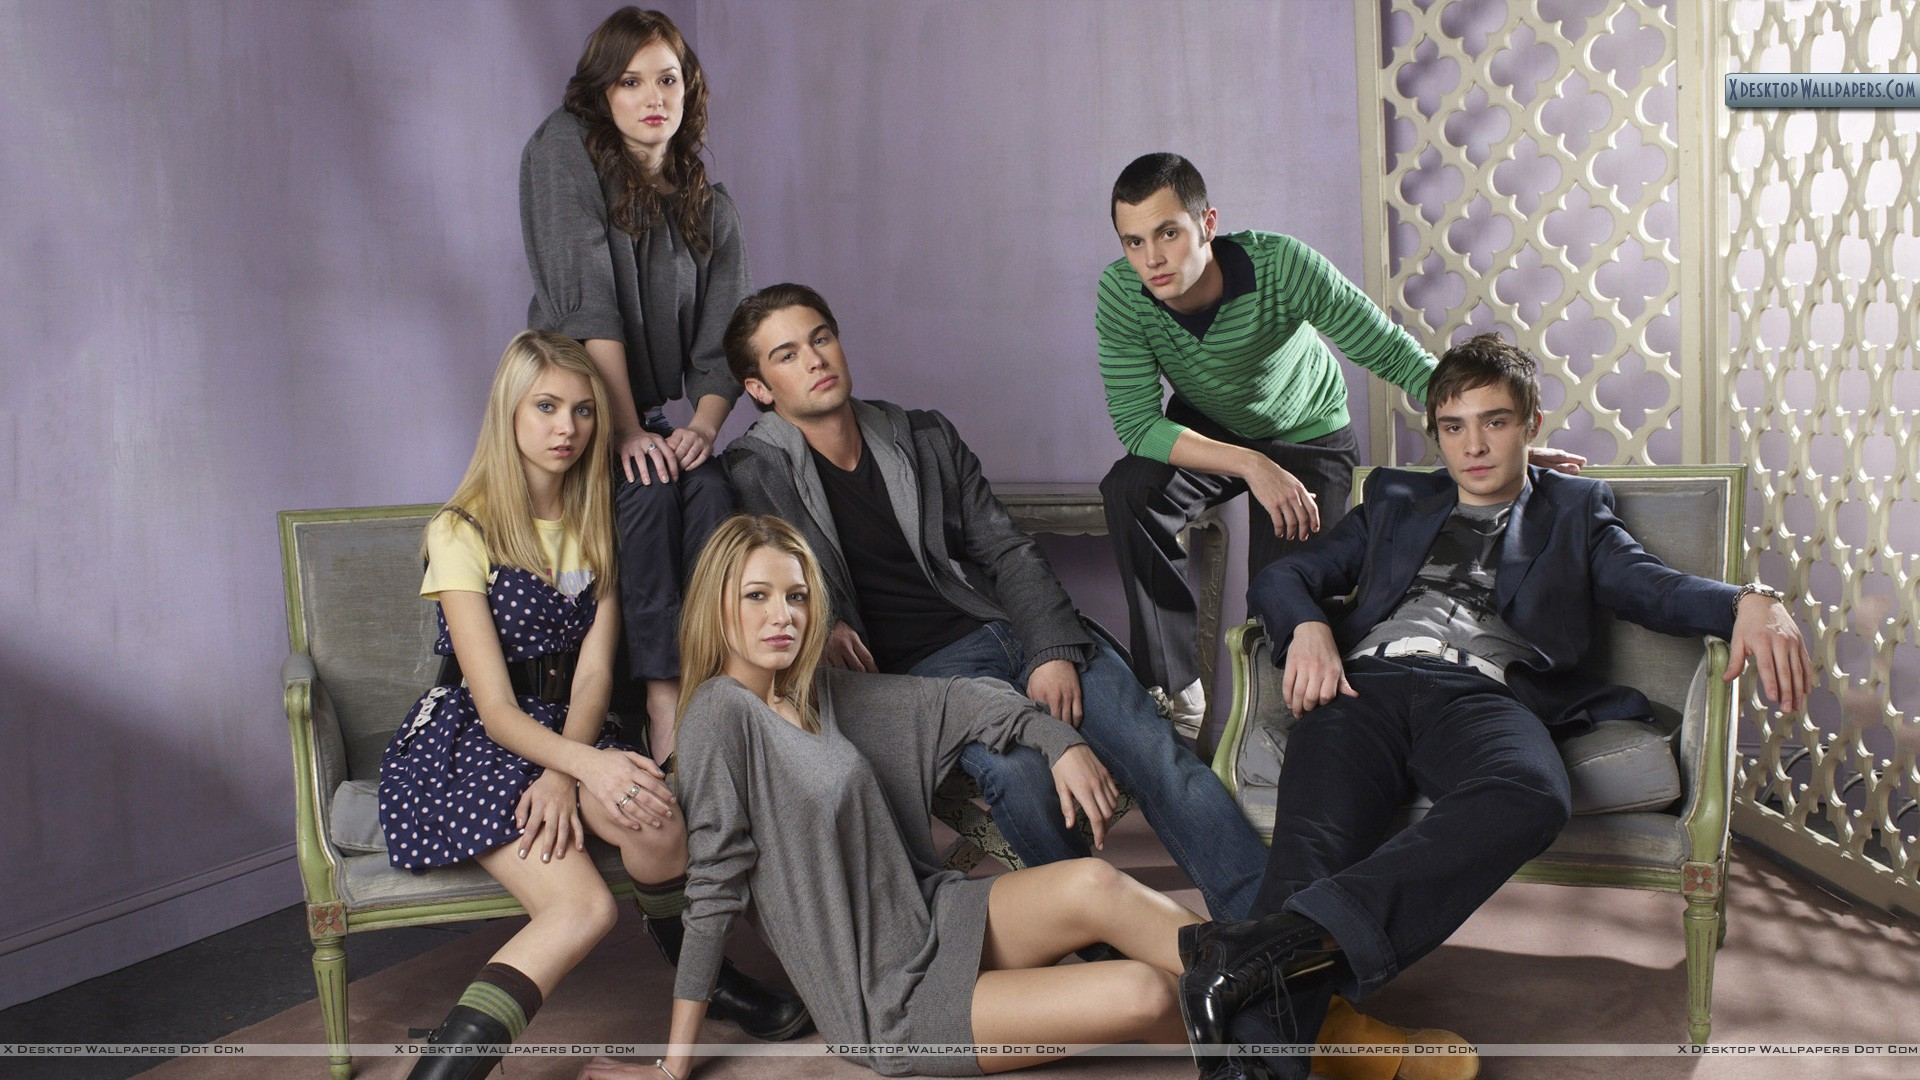

In [ ]:
img1 = 'https://ak2.picdn.net/shutterstock/videos/12795122/thumb/1.jpg'
img2 = 'https://i.pinimg.com/originals/d0/dd/a1/d0dda1ad94c08dc8581c7a894d0a6bb4.jpg'
img3 = 'https://xdesktopwallpapers.com/wp-content/uploads/2011/10/Group-Pose-In-Gossip-Girl.jpg'
!wget -O img.jpg {img3}

image1 = cv2.imread("img.jpg")

frameWidth = image1.shape[1]
frameHeight = image1.shape[0]

from IPython.display import Image
Image(filename='img.jpg') 

In [ ]:
t = time.time()
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Fix the input Height and get the width according to the Aspect Ratio
inHeight = 368
inWidth = int((inHeight/frameHeight)*frameWidth)

inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
print("Time Taken = {}".format(time.time() - t))

Time Taken = 14.370393753051758


(-0.5, 1919.5, 1079.5, -0.5)

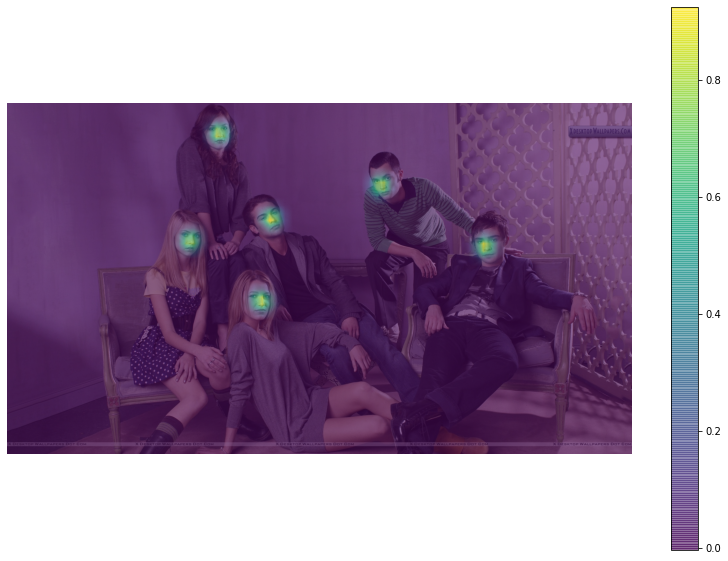

In [ ]:
i = 0
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (frameWidth, frameHeight))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

Keypoints - Nose : [(784, 620, 0.8166424), (1463, 435, 0.8573251), (572, 433, 0.73616046), (808, 363, 0.9242133), (1158, 247, 0.7702663), (644, 104, 0.7978853)]
Keypoints - Neck : [(760, 715, 0.8016937), (526, 528, 0.8599465), (1486, 505, 0.8425533), (832, 457, 0.7977319), (1205, 270, 0.7916878), (643, 176, 0.7582323)]
Keypoints - R-Sho : [(714, 715, 0.72749805), (456, 528, 0.8022957), (1393, 505, 0.78527737), (760, 480, 0.6950463), (1112, 293, 0.8433532), (572, 153, 0.67186326)]
Keypoints - R-Elb : [(713, 903, 0.7882191), (502, 715, 0.76724374), (807, 576, 0.39317206), (1276, 574, 0.87769544), (1135, 433, 0.81320816), (596, 316, 0.76526797)]
Keypoints - R-Wr : [(667, 1069, 0.5494213), (574, 763, 0.81326205), (831, 644, 0.6897219), (1299, 622, 0.8369813), (1230, 458, 0.81074244), (621, 433, 0.8077433)]
Keypoints - L-Sho : [(807, 693, 0.63493335), (596, 528, 0.74654347), (1579, 505, 0.669508), (924, 434, 0.8404905), (1276, 269, 0.7997721), (713, 199, 0.76200897)]
Keypoints - L-Elb : [(9

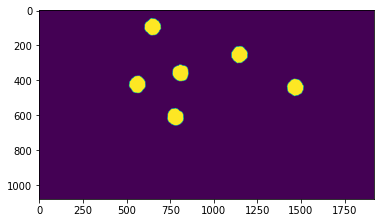

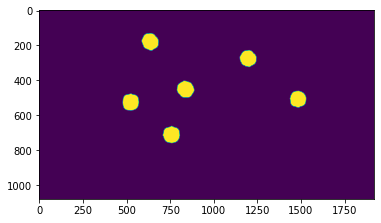

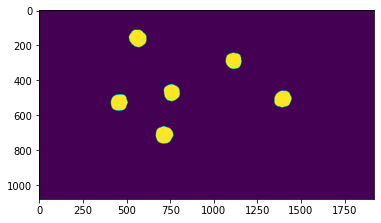

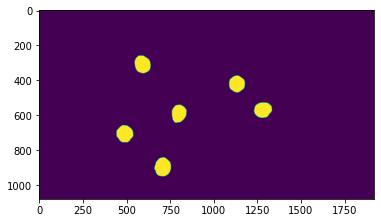

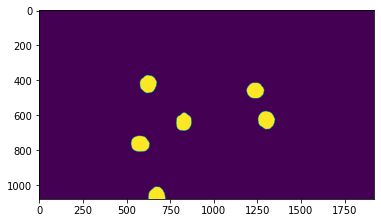

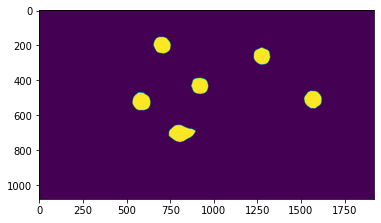

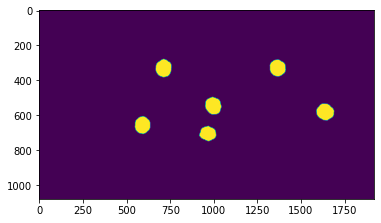

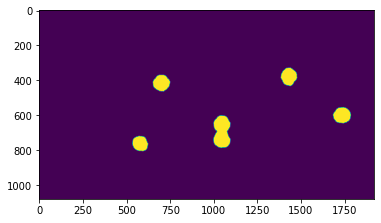

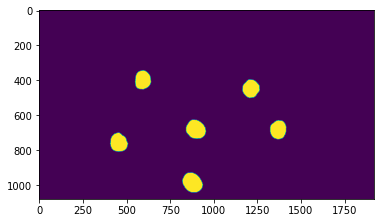

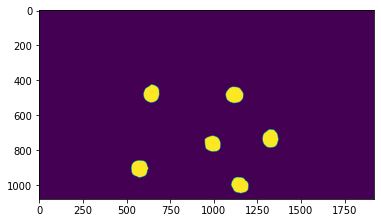

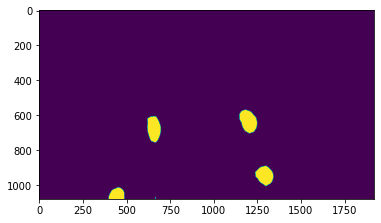

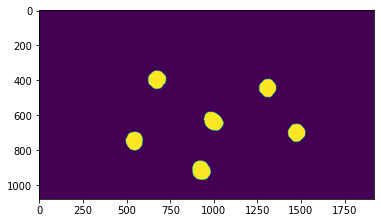

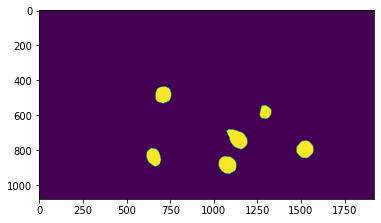

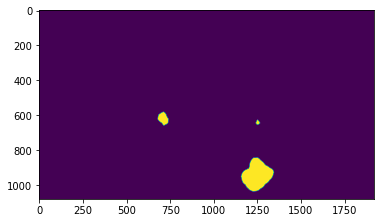

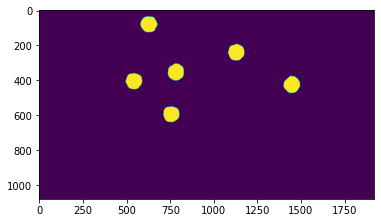

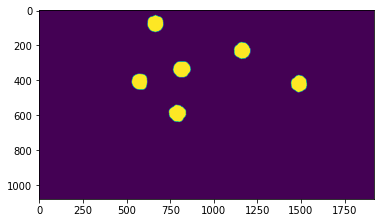

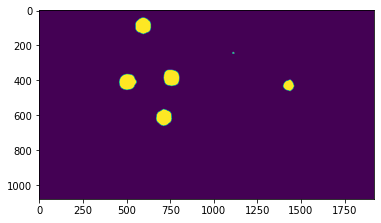

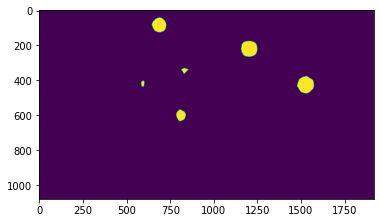

In [ ]:
detected_keypoints = []
keypoints_list = np.zeros((0,3))
keypoint_id = 0
threshold = 0.1

for part in range(nPoints):
    probMap = output[0,part,:,:]
    probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
    plt.figure()
    plt.imshow(255*np.uint8(probMap>threshold))
    keypoints = getKeypoints(probMap, threshold)
    print("Keypoints - {} : {}".format(keypointsMapping[part], keypoints))
    keypoints_with_id = []
    for i in range(len(keypoints)):
        keypoints_with_id.append(keypoints[i] + (keypoint_id,))
        keypoints_list = np.vstack([keypoints_list, keypoints[i]])
        keypoint_id += 1

    detected_keypoints.append(keypoints_with_id)

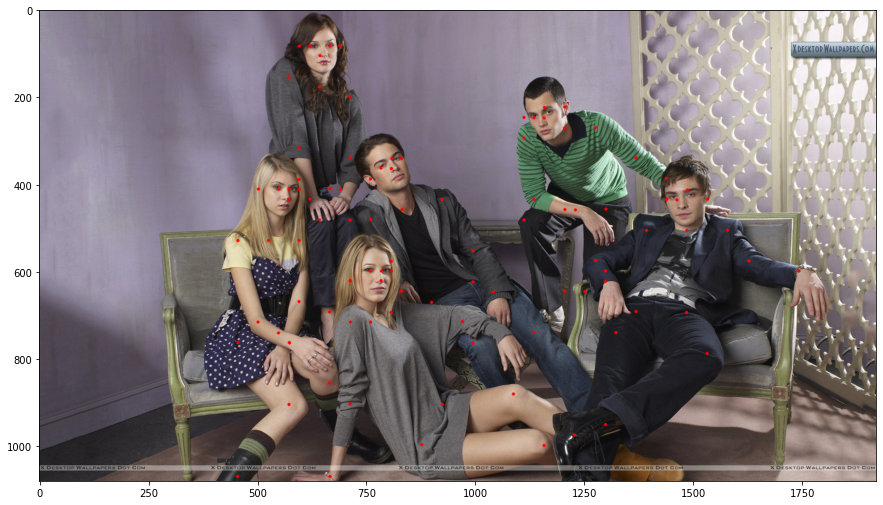

In [ ]:
frameClone = image1.copy()
for i in range(nPoints):
    for j in range(len(detected_keypoints[i])):
        cv2.circle(frameClone, detected_keypoints[i][j][0:2], 3, [0,0,255], -1, cv2.LINE_AA)
plt.figure(figsize=[15,15])
plt.imshow(frameClone[:,:,[2,1,0]])

[array([[ 6.        , 12.        ,  0.91515949],
       [ 7.        , 13.        ,  0.91438698],
       [ 8.        , 14.        ,  0.85948821],
       [ 9.        , 15.        ,  0.91458044],
       [10.        , 16.        ,  0.75440451],
       [11.        , 17.        ,  0.70949535]]), array([[ 6.        , 30.        ,  0.64438268],
       [ 7.        , 31.        ,  0.91607474],
       [ 8.        , 32.        ,  0.84972408],
       [ 9.        , 33.        ,  0.87259498],
       [10.        , 34.        ,  0.89908645],
       [11.        , 35.        ,  0.76590031]]), array([[12.        , 18.        ,  0.92001103],
       [13.        , 19.        ,  0.89476259],
       [14.        , 21.        ,  0.74093826],
       [15.        , 20.        ,  0.74103687],
       [16.        , 22.        ,  0.81698293],
       [17.        , 23.        ,  0.91928754]]), array([[18.        , 24.        ,  0.65821907],
       [19.        , 25.        ,  0.93935756],
       [20.        , 26.        ,

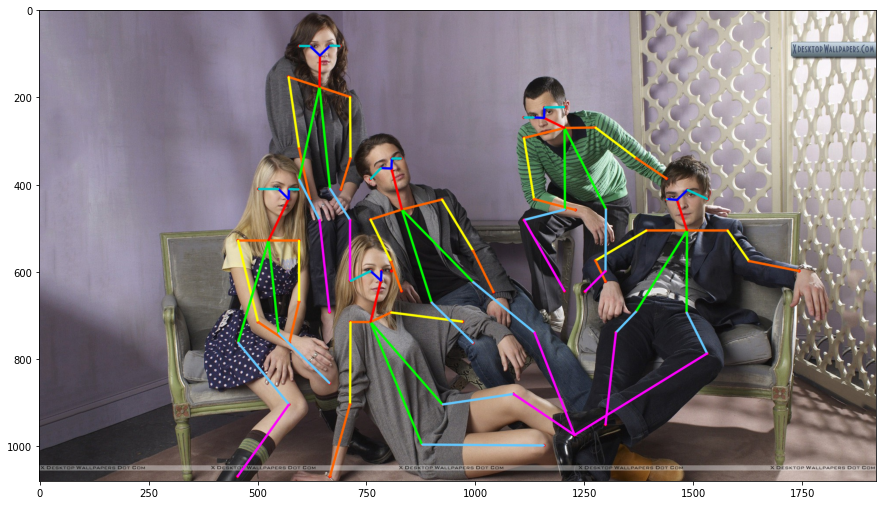

In [ ]:
valid_pairs, invalid_pairs = getValidPairs(output)

personwiseKeypoints = getPersonwiseKeypoints(valid_pairs, invalid_pairs)

for i in range(17):
    for n in range(len(personwiseKeypoints)):
        index = personwiseKeypoints[n][np.array(POSE_PAIRS[i])]
        if -1 in index:
            continue
        B = np.int32(keypoints_list[index.astype(int), 0])
        A = np.int32(keypoints_list[index.astype(int), 1])
        cv2.line(frameClone, (B[0], A[0]), (B[1], A[1]), colors[i], 3, cv2.LINE_AA)
        
plt.figure(figsize=[15,15])
plt.imshow(frameClone[:,:,[2,1,0]])

## Multi Person PyTorch

In [ ]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

!pip install munkres
import model_utils
import plot_utils
import custom_transforms
from dataset import COCO_Person_Dataset
from nn_model import Net
from CONSTANTS import idx_to_keypoint_type
from custom_transforms import *
import torch.nn.functional as F
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import time
import cv2

In [ ]:
git_repo_url = 'https://github.com/DhruvJawalkar/PyTorch-OpenPose-Realtime-Multi-Person-2D-Pose-Estimation-using-Part-Affinity-Fields.git'
!git clone $git_repo_url

import os
from os.path import exists, join, basename, splitext
project_name = splitext(basename(git_repo_url))[0]
%cd $project_name

/content/PyTorch-OpenPose-Realtime-Multi-Person-2D-Pose-Estimation-using-Part-Affinity-Fields


In [ ]:
#17 keypoints
#'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 
#'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 
#'right_knee', 'left_ankle', 'right_ankle'

In [ ]:
processed_files = {
    'img_id_to_annotations': 'img_id_to_annotations.npy',
    'img_id_to_image_info' : 'img_id_to_image_info.npy',
    'im_ids' : 'im_ids.npy'
}

In [ ]:
IM_SIZE = 368
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
mean, std = torch.tensor(mean), torch.tensor(std)

tfms = transforms.Compose([
    RandomCrop(size=368, p=0.5),
    ResizeImgAndKeypoints(size=IM_SIZE),
    ColorJitter(),
    RandomGrayscale(),
    FlipHR(p=0.5),
    #FlipUD(),
    #RandomRotateImgAndKeypoints(deg=30, p=1)
])

tensor_tfms = transforms.Compose([
    ToTensor(),
    NormalizeImg(mean, std)
])

UnNormalize = UnNormalizeImgBatch(mean, std)
To_Pil = transforms.ToPILImage()

In [ ]:
bs = 8
ds = COCO_Person_Dataset('train2014/', processed_files, tfms, tensor_tfms, im_sz=IM_SIZE)
dl = torch.utils.data.DataLoader(ds, bs, shuffle=True)

In [ ]:
# i,i_stg_input,pafs,paf_ind,hms,hms_ind = ds[1000]
# scaled_pafs = F.interpolate(pafs[None].clone().detach(), IM_SIZE, mode="bilinear", align_corners=True).to(device)[0] 
# un_im = To_Pil(UnNormalize(i)[0])
# plt.imshow(un_im)
# plot_utils.plot_pafs(un_im, scaled_pafs.clone().detach().cpu().numpy(), figsize=(20,20))
# plot_utils.plot_heatmaps(un_im, hms.clone().detach().cpu().numpy(), figsize=(20,20))

In [ ]:
model = Net(in_training=True)
model.load_state_dict(torch.load('model-wts-368.ckpt', map_location='cpu'))
model.set_to_inference()
'''
model.unfreeze_F()
model.train_paf_stage(4)
model.unfreeze_all_paf_stages()

model.train_hm_stage(2)
model.unfreeze_all_hm_stages()
'''
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


Net(
  (F): F(
    (vgg): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): Conv2d(256, 256

In [ ]:
def make_pose_predictions_and_save_img(im_path, model, IM_SIZE=IM_SIZE, show_plots=False):
    test_tensor_tfms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(torch.tensor([0.485, 0.456, 0.406]), torch.tensor([0.229, 0.224, 0.225]))
    ])
    
    Resize_im = Resize(IM_SIZE)
    
    IM_STG_INPUT_SIZE = 46 
    if(IM_SIZE==184):
        IM_STG_INPUT_SIZE = 23    
    
    pf, hm, un_im, pad = model_utils.get_pafs_and_hms_predictions(im_path, model, test_tensor_tfms, Resize_im, IM_SIZE, IM_STG_INPUT_SIZE)     
    joint_pos_map = model_utils.get_joint_positions(hm.cpu().numpy(), nms_window=int(368*30/IM_SIZE))
    part_matches_map = model_utils.calculate_part_matches_from_predicted_joints_and_pafs(joint_pos_map, pf.cpu())
    
    oriImg = cv2.imread(im_path)
    canvas = model_utils.draw_bodypose(oriImg, part_matches_map, pad, IM_SIZE)
    cv2.imwrite(im_path.split('/')[-1], canvas)
    
    if(show_plots):
        plot_utils.plot_pafs(un_im, pf.cpu().numpy(), figsize=(20,20))
        plot_utils.plot_heatmaps(un_im, hm.cpu().numpy(), figsize=(20,20))
        plt.imshow(canvas[:, :, [2, 1, 0]])
        plt.show()
        plot_utils.plot_matching_results(un_im, part_matches_map, joint_pos_map, pf)

In [ ]:
%%time

path = './test-images/office/'

for im_path in list(Path(path).iterdir()):
    im_path = str(im_path)
    if('.jpg'in im_path or '.png' in im_path):
        print(im_path)
        make_pose_predictions_and_save_img(im_path, model, IM_SIZE=IM_SIZE)

test-images/office/15.png
test-images/office/8.png
test-images/office/2.png
test-images/office/9.png
test-images/office/5.png
test-images/office/14.png
test-images/office/7.png
test-images/office/4.png
test-images/office/1.png
test-images/office/11.png
test-images/office/12.png
test-images/office/13.png
test-images/office/3.png
test-images/office/10.png
CPU times: user 26.9 s, sys: 9.65 s, total: 36.6 s
Wall time: 26.4 s


--2020-04-21 22:39:38--  https://xdesktopwallpapers.com/wp-content/uploads/2011/10/Group-Pose-In-Gossip-Girl.jpg
Resolving xdesktopwallpapers.com (xdesktopwallpapers.com)... 78.46.39.46
Connecting to xdesktopwallpapers.com (xdesktopwallpapers.com)|78.46.39.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478852 (468K) [image/jpeg]
Saving to: ‘/content/img_pytorch.jpg’

/content/img_pytorc 100%[===================>] 467.63K   311KB/s    in 1.5s    

2020-04-21 22:39:41 (311 KB/s) - ‘/content/img_pytorch.jpg’ saved [478852/478852]



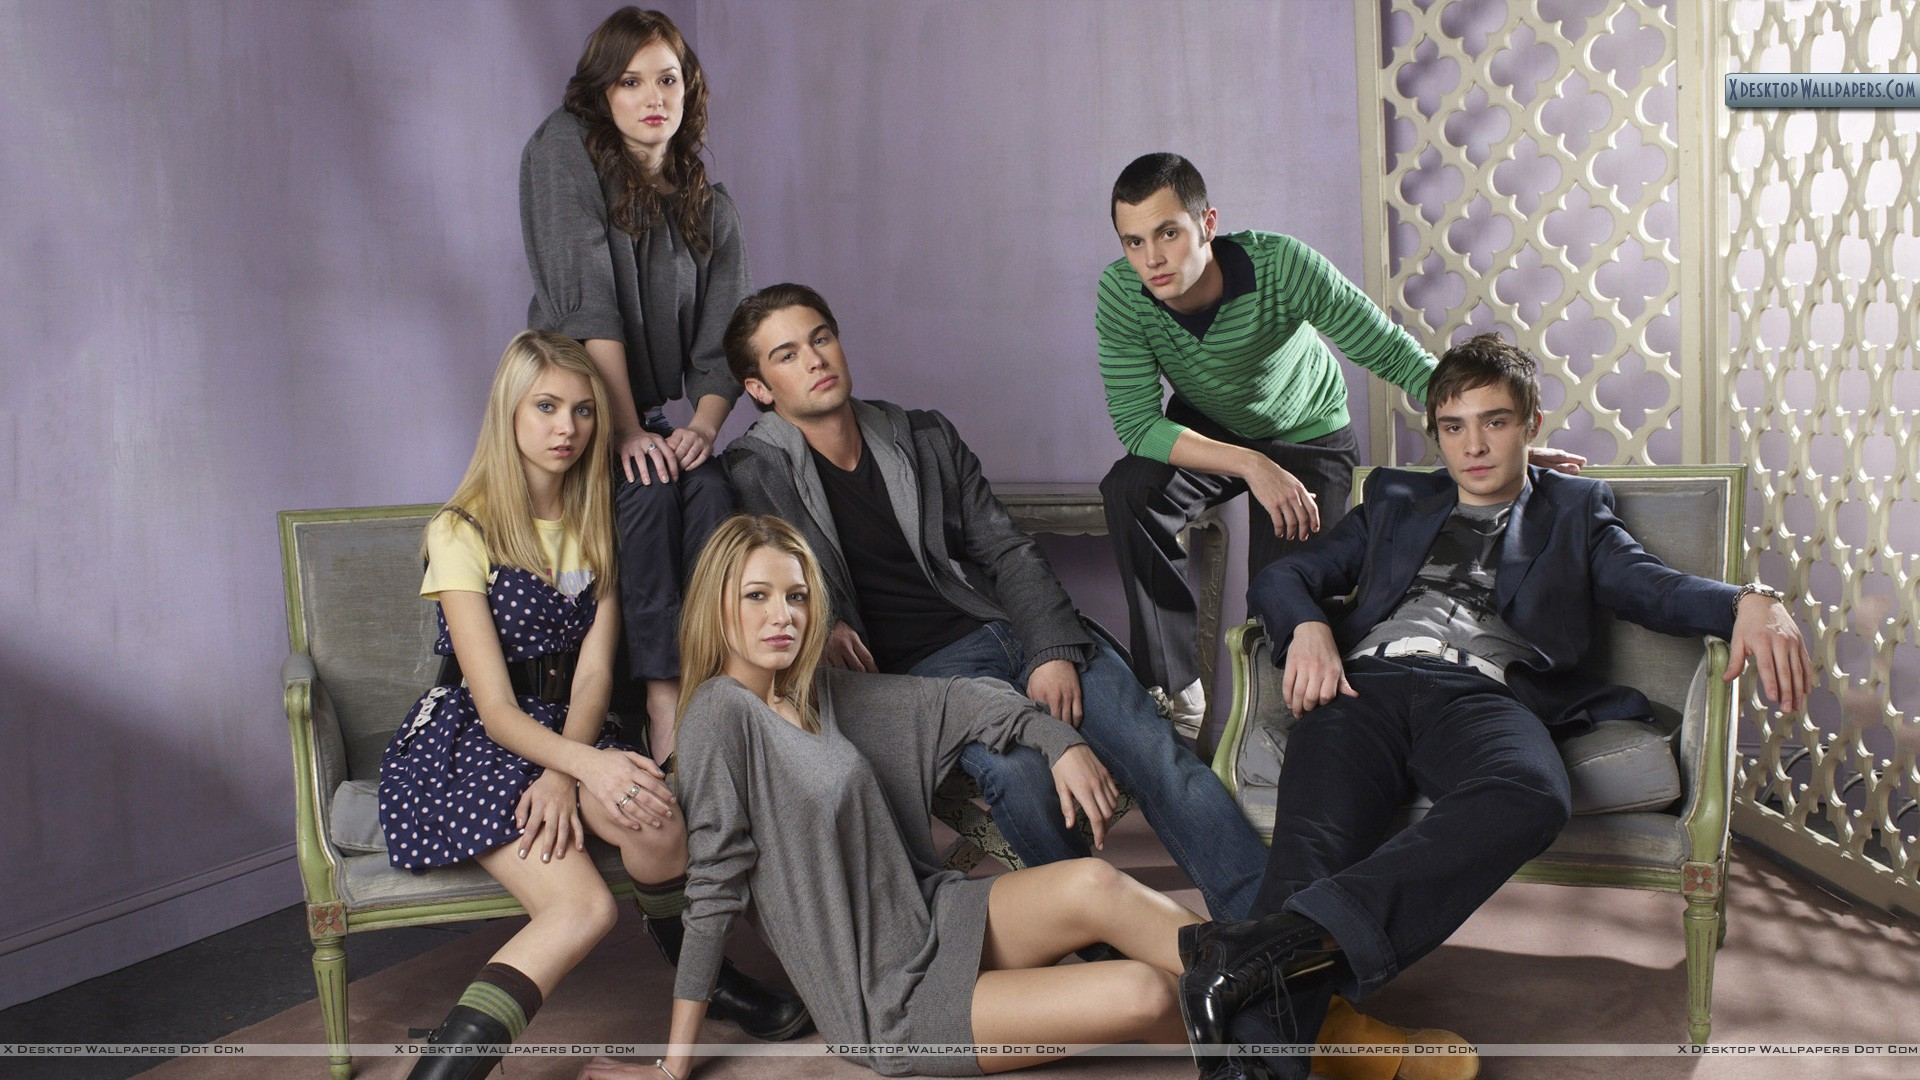

In [ ]:
img1 = 'https://static.toiimg.com/thumb/resizemode-4,width-1200,msid-69495469/69495469.jpg'
img2 = 'https://xdesktopwallpapers.com/wp-content/uploads/2011/10/Group-Pose-In-Gossip-Girl.jpg'

!wget -O /content/img_pytorch.jpg {img1}

from IPython.display import Image
Image('/content/img_pytorch.jpg') 

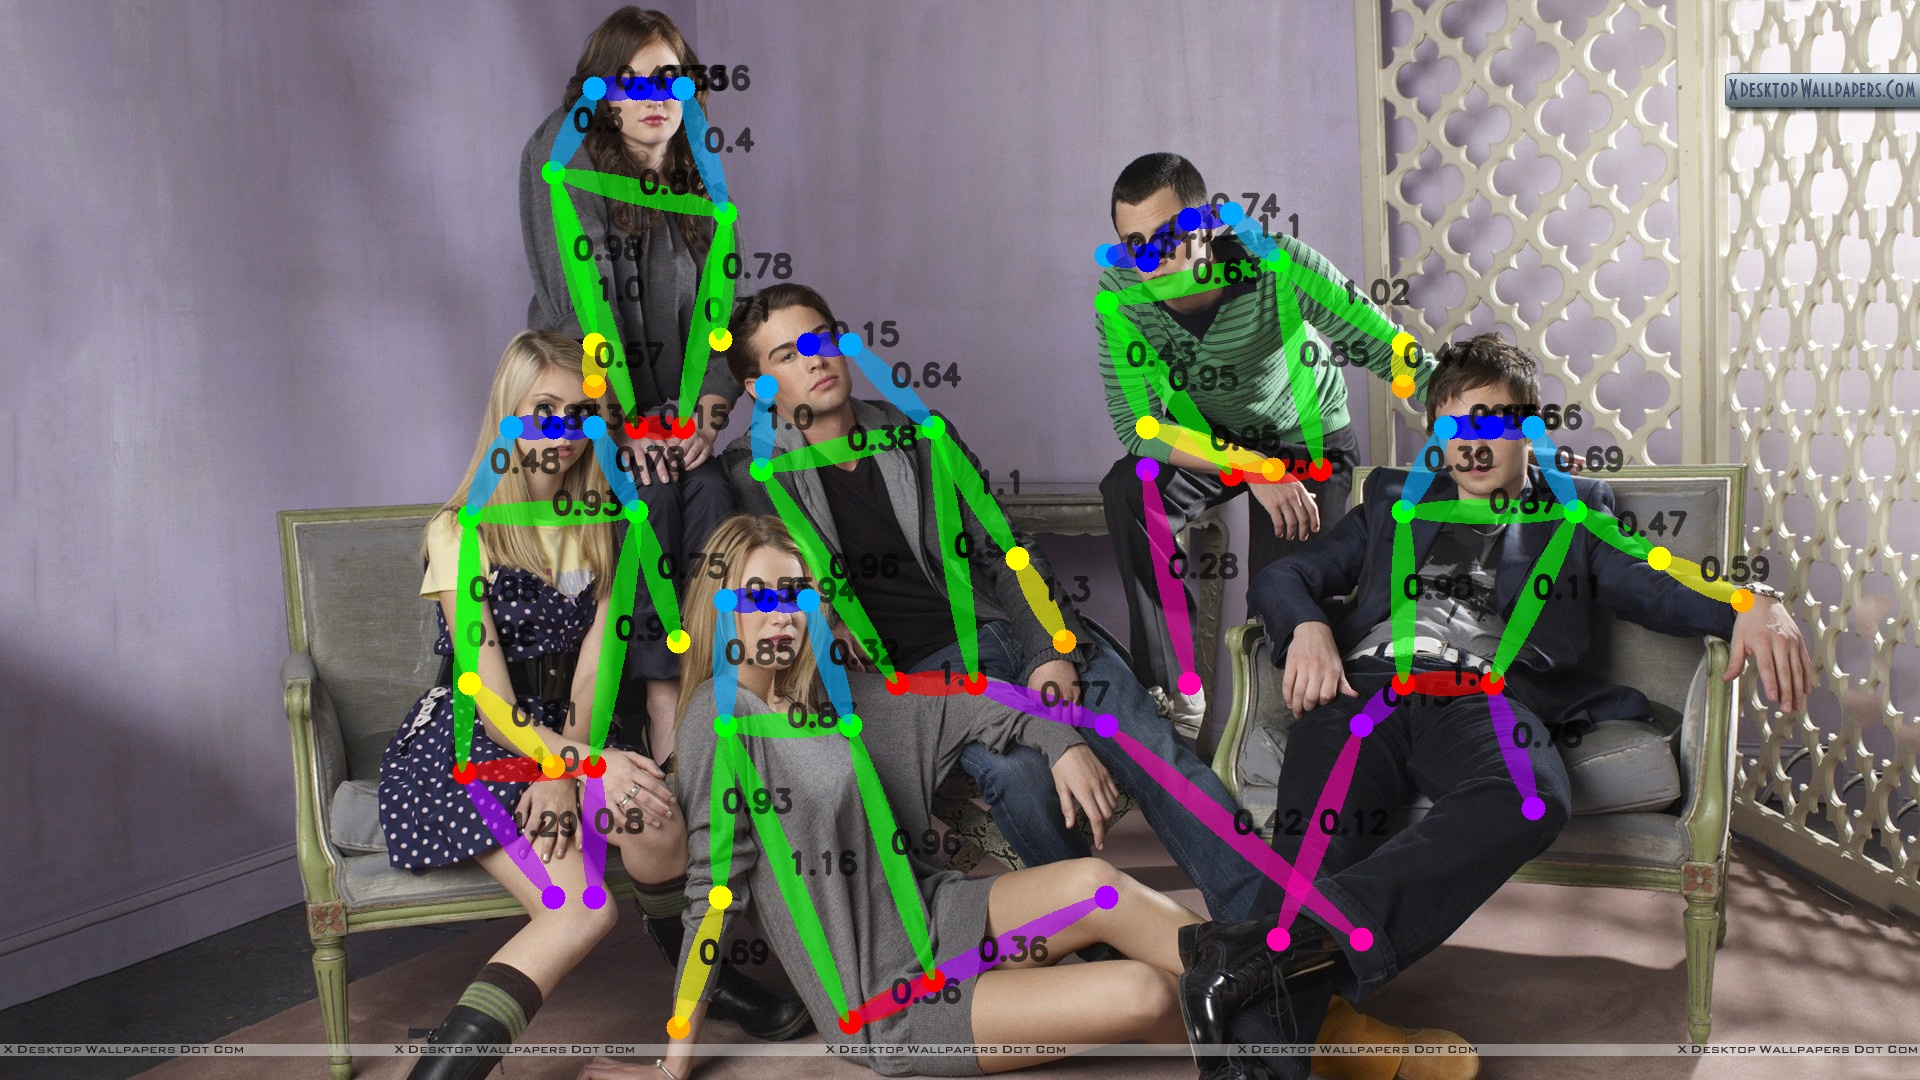

In [ ]:
make_pose_predictions_and_save_img('/content/img_pytorch.jpg', model, IM_SIZE=IM_SIZE)
out_path = '/content/PyTorch-OpenPose-Realtime-Multi-Person-2D-Pose-Estimation-using-Part-Affinity-Fields/img_pytorch.jpg'
Image(out_path) 